In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

In [15]:
data=pd.read_csv('../Datasets/fire_archive_M6_67636.csv')
print(data.shape)
for i in range(len(data)): 
    data.loc[i,'Day'] = int(data.loc[i,'acq_date'].split('-')[0])
    data.loc[i,'Month'] = int(data.loc[i,'acq_date'].split('-')[1])
    data.loc[i,'Year'] = int(data.loc[i,'acq_date'].split('-')[2])
#print(data['Day'][0])
#print(data['Month'][0])
#print(data['Year'][0])
#print(data.head())
print(data.shape)
data.head()
# data.tail()

(37131, 15)
(37131, 18)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Day,Month,Year
0,29.7427,76.6679,328.7,2.9,1.6,01-05-2017,618,Terra,MODIS,68,6.2,311.5,48.2,D,0.0,1.0,5.0,2017.0
1,30.4988,74.0669,333.4,1.9,1.3,01-05-2017,618,Terra,MODIS,77,6.2,312.7,33.6,D,0.0,1.0,5.0,2017.0
2,30.2280,75.1271,330.2,2.3,1.5,01-05-2017,618,Terra,MODIS,73,6.2,315.3,28.3,D,0.0,1.0,5.0,2017.0
3,30.5747,75.5177,328.7,2.3,1.5,01-05-2017,618,Terra,MODIS,73,6.2,312.8,27.4,D,0.0,1.0,5.0,2017.0
4,30.4250,75.3941,334.0,2.3,1.5,01-05-2017,618,Terra,MODIS,80,6.2,313.5,47.6,D,0.0,1.0,5.0,2017.0


In [16]:
date=data['acq_date']

In [17]:
#data.describe()

In [18]:
#data.head()


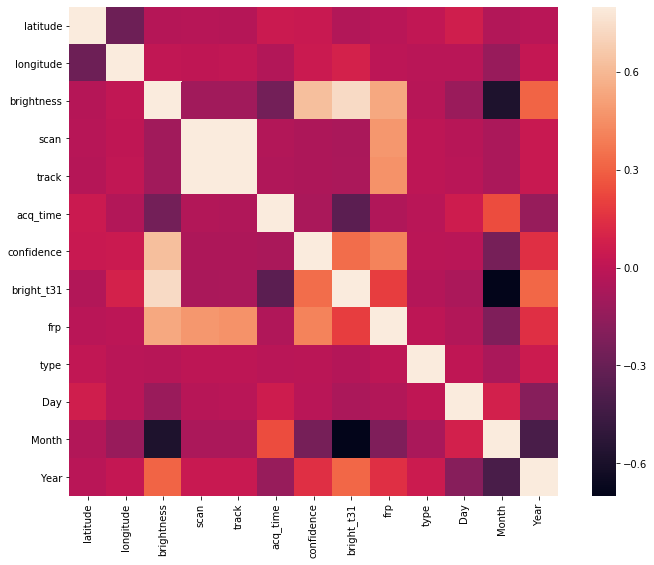

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp,type,Day,Month,Year
latitude,1.000000,-0.282196,-0.027140,-0.022061,-0.028005,0.045562,0.043018,-0.041551,-0.017173,0.009663,0.068445,-0.040402,-0.019660
longitude,-0.282196,1.000000,0.010316,0.008218,0.010260,-0.040722,0.046108,0.085362,-0.004494,-0.015150,-0.017764,-0.128208,0.023141
brightness,-0.027140,0.010316,1.000000,-0.096736,-0.097754,-0.256915,0.627181,0.730887,0.541797,-0.025851,-0.123117,-0.579982,0.309158
scan,-0.022061,0.008218,-0.096736,1.000000,0.978335,-0.038499,-0.059382,-0.069472,0.481619,0.002002,-0.020472,-0.064539,0.040041
track,-0.028005,0.010260,-0.097754,0.978335,1.000000,-0.046361,-0.060801,-0.063541,0.463010,0.001031,-0.019350,-0.065266,0.038738
acq_time,0.045562,-0.040722,-0.256915,-0.038499,-0.046361,1.000000,-0.070486,-0.348471,-0.046177,-0.016042,0.057847,0.242747,-0.136316
confidence,0.043018,0.046108,0.627181,-0.059382,-0.060801,-0.070486,1.000000,0.339970,0.412072,-0.008862,-0.017682,-0.247388,0.148747
bright_t31,-0.041551,0.085362,0.730887,-0.069472,-0.063541,-0.348471,0.339970,1.000000,0.192637,-0.035983,-0.066646,-0.700118,0.321684
frp,-0.017173,-0.004494,0.541797,0.481619,0.463010,-0.046177,0.412072,0.192637,1.000000,-0.000346,-0.042565,-0.214649,0.148756
type,0.009663,-0.015150,-0.025851,0.002002,0.001031,-0.016042,-0.008862,-0.035983,-0.000346,1.000000,0.008330,-0.067755,0.054517


In [19]:
cormat=data.corr()
fig=plt.figure(figsize =(12,9))
sns.heatmap(cormat,vmax=.8,square=True)
plt.show()
cormat

In [20]:
Adata=data[['latitude','longitude','brightness'  ,'scan' , 'track','acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'type','Day' , 'Month','Year']]
Adata.head()


,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type,Day,Month,Year
0,29.7427,76.6679,328.7,2.9,1.6,618,68,6.2,311.5,48.2,0.0,1.0,5.0,2017.0
1,30.4988,74.0669,333.4,1.9,1.3,618,77,6.2,312.7,33.6,0.0,1.0,5.0,2017.0
2,30.2280,75.1271,330.2,2.3,1.5,618,73,6.2,315.3,28.3,0.0,1.0,5.0,2017.0
3,30.5747,75.5177,328.7,2.3,1.5,618,73,6.2,312.8,27.4,0.0,1.0,5.0,2017.0
4,30.4250,75.3941,334.0,2.3,1.5,618,80,6.2,313.5,47.6,0.0,1.0,5.0,2017.0


In [21]:
br=data['brightness']
br_31=data['bright_t31']
mon=data['Month']
con=data['confidence']
pwr=data['frp']
print(br.shape)
print(br_31.shape)
print(mon.shape)
print(con.shape)

(37131,)
(37131,)
(37131,)
(37131,)


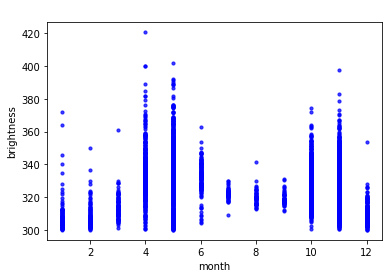

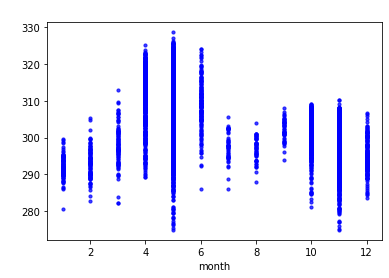

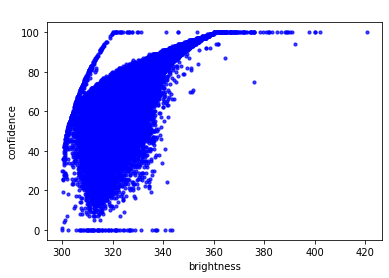

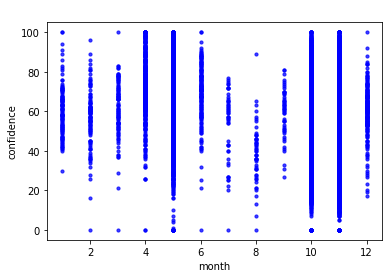

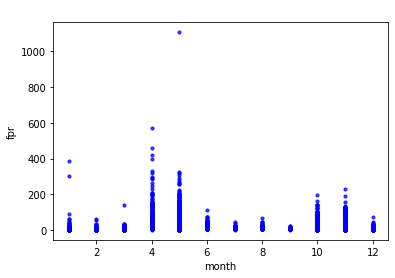

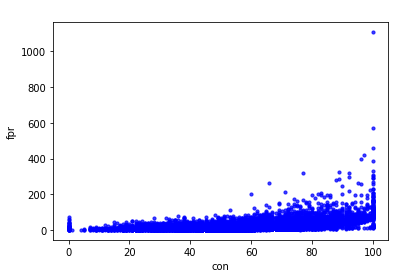

In [22]:
def scatterplot(y2,y1,x_label=" ",y_label=" ",title=" ",color="b",yscale_log=False):
    _, ax=plt.subplots()
    ax.scatter(y2,y1,s=10, color = color, alpha=0.75)
    
    if yscale_log==True:
        ax.set_yscale('log')
        
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

scatterplot(mon,br,'month','brightness')
scatterplot(mon,br_31,'month')
scatterplot(br,con,'brightness','confidence')
scatterplot(mon,con,'month','confidence')
scatterplot(mon,pwr,'month','fpr')
scatterplot(con,pwr,'con','fpr')

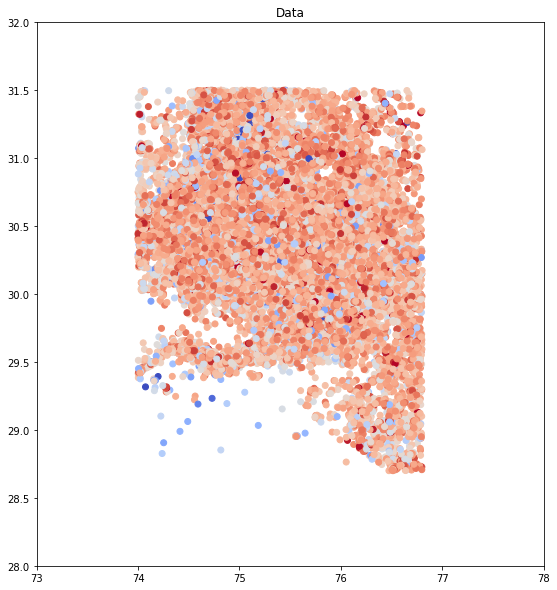

In [23]:
plt.figure(figsize=(20, 10))

ax = plt.subplot(1,2,2)
ax.set_title("Data")

ax.set_autoscaley_on(False)
ax.set_ylim([28, 32])
ax.set_autoscalex_on(False)
ax.set_xlim([73, 78])
plt.scatter(data["longitude"],
            data["latitude"],
            cmap="coolwarm",
            c=data["confidence"] / data["confidence"].max())
_ = plt.plot()

In [34]:
columns = np.full((cormat.shape[0],), True, dtype=bool)
for i in range(cormat.shape[0]):
    for j in range(i+1, cormat.shape[0]):
        if cormat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = ['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'type','Day' , 'Month','Year']

data = Adata[['latitude','longitude','brightness'  ,'scan' , 'acq_time','confidence',  'version' , 'bright_t31'  , 'frp' ,'type','Day' , 'Month','Year']]

data['acq_date']=date

data.head()

,latitude,longitude,brightness,scan,acq_time,confidence,version,bright_t31,frp,type,Day,Month,Year,acq_date
0,29.7427,76.6679,328.7,2.9,618,68,6.2,311.5,48.2,0.0,1.0,5.0,2017.0,01-05-2017
1,30.4988,74.0669,333.4,1.9,618,77,6.2,312.7,33.6,0.0,1.0,5.0,2017.0,01-05-2017
2,30.2280,75.1271,330.2,2.3,618,73,6.2,315.3,28.3,0.0,1.0,5.0,2017.0,01-05-2017
3,30.5747,75.5177,328.7,2.3,618,73,6.2,312.8,27.4,0.0,1.0,5.0,2017.0,01-05-2017
4,30.4250,75.3941,334.0,2.3,618,80,6.2,313.5,47.6,0.0,1.0,5.0,2017.0,01-05-2017


In [36]:
l=list(selected_columns)
l.remove('confidence')
features=data[l]
print(features.head())
target = pd.DataFrame()
target=data[['confidence']]
print(target.head())
target.describe()

   latitude  longitude  brightness  scan  acq_time version  bright_t31   frp  \
0   29.7427    76.6679       328.7   2.9       618     6.2       311.5  48.2   
1   30.4988    74.0669       333.4   1.9       618     6.2       312.7  33.6   
2   30.2280    75.1271       330.2   2.3       618     6.2       315.3  28.3   
3   30.5747    75.5177       328.7   2.3       618     6.2       312.8  27.4   
4   30.4250    75.3941       334.0   2.3       618     6.2       313.5  47.6   

   type  Day  Month    Year  
0   0.0  1.0    5.0  2017.0  
1   0.0  1.0    5.0  2017.0  
2   0.0  1.0    5.0  2017.0  
3   0.0  1.0    5.0  2017.0  
4   0.0  1.0    5.0  2017.0  
   confidence
0          68
1          77
2          73
3          73
4          80


,confidence
count,37131.000000
mean,63.397350
std,16.099522
min,0.000000
25%,55.000000
50%,66.000000
75%,75.000000
max,100.000000


In [37]:
for i in target.index:
    if target['confidence'][i]<=40:
        target.at[i, 'confidence'] = 0
    elif target['confidence'][i]<=65:
        target.at[i, 'confidence'] = 1
    else:
        target.at[i, 'confidence'] = 2

In [38]:
target['confidence']
target.describe()

,confidence
count,37131.000000
mean,1.406911
std,0.663199
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [45]:
# type(features['version'][0])

fig = plt.figure(figsize = (20, 25))
j = 0
for i in features.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(features[i][target['confidence']==0], color='y', label = 'low-confidence fire')
    sns.distplot(features[i][target['confidence']==1], color='g', label = 'nominal-confidence fire')
    sns.distplot(features[i][target['confidence']==2], color='r', label = 'high-confidence fire')
    plt.legend(loc='best')
fig.suptitle('Crop Burning Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

str

In [46]:
data.to_pickle("fire_data.pkl")

In [47]:
abc = pd.read_pickle("fire_data.pkl")

In [48]:
abc.head()


,latitude,longitude,brightness,scan,acq_time,confidence,version,bright_t31,frp,type,Day,Month,Year,acq_date
0,29.7427,76.6679,328.7,2.9,618,68,6.2,311.5,48.2,0.0,1.0,5.0,2017.0,01-05-2017
1,30.4988,74.0669,333.4,1.9,618,77,6.2,312.7,33.6,0.0,1.0,5.0,2017.0,01-05-2017
2,30.2280,75.1271,330.2,2.3,618,73,6.2,315.3,28.3,0.0,1.0,5.0,2017.0,01-05-2017
3,30.5747,75.5177,328.7,2.3,618,73,6.2,312.8,27.4,0.0,1.0,5.0,2017.0,01-05-2017
4,30.4250,75.3941,334.0,2.3,618,80,6.2,313.5,47.6,0.0,1.0,5.0,2017.0,01-05-2017
